In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pnuemonia X Ray Image**

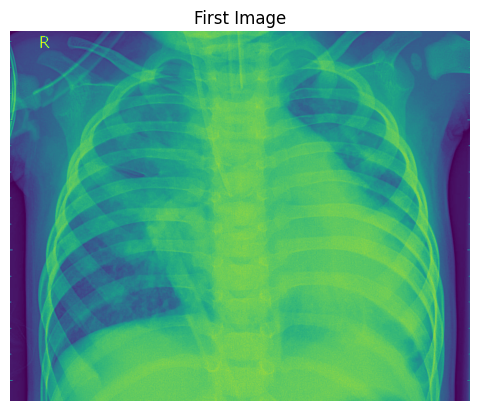

In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image
data_dir ="/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA"
image_files = os.listdir(data_dir)
image_path = os.path.join(data_dir, image_files[0])
image = Image.open(image_path)
plt.imshow(image)
plt.title('First Image')
plt.axis('off')
plt.show()


**Normal X Ray Image**

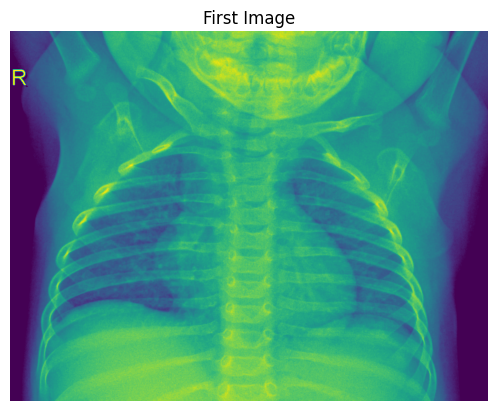

In [12]:
data_dir = "/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL"
image_files = os.listdir(data_dir)
image_path = os.path.join(data_dir, image_files[0])
image = Image.open(image_path)
plt.imshow(image)
plt.title('First Image')
plt.axis('off')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [14]:
from tensorflow.keras.models import Sequential,Model

In [15]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization

In [16]:
traingen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
testgen = ImageDataGenerator(rescale = 1./255)
valgen=ImageDataGenerator(rescale=1/255.)

In [17]:
training_set =traingen.flow_from_directory("/content/drive/MyDrive/chest_xray/chest_xray/train",target_size = (224, 224),batch_size = 8,class_mode = 'binary')
test_set = testgen.flow_from_directory("/content/drive/MyDrive/chest_xray/chest_xray/test",target_size = (224, 224),batch_size = 8,class_mode = 'binary')
val_set= valgen.flow_from_directory("/content/drive/MyDrive/chest_xray/chest_xray/val",target_size = (224, 224),batch_size = 8,class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
df=pd.DataFrame(training_set.classes)
df.value_counts()

1    3875
0    1341
dtype: int64

In [ ]:
df=pd.DataFrame(val_set.classes)
df.value_counts()

0    8
1    8
dtype: int64

In [ ]:
df=pd.DataFrame(test_set.classes)
df.value_counts()

1    390
0    234
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 15
history = model.fit(training_set, validation_data=test_set,steps_per_epoch = 200, epochs=epochs, batch_size=32)

Epoch 1/15
200/200 [==============================] - 372s 2s/step - loss: 0.5461 - accuracy: 0.7650 - val_loss: 0.6653 - val_accuracy: 0.6250
Epoch 2/15
200/200 [==============================] - 127s 634ms/step - loss: 0.4001 - accuracy: 0.8350 - val_loss: 0.3483 - val_accuracy: 0.8526
Epoch 3/15
200/200 [==============================] - 105s 524ms/step - loss: 0.3542 - accuracy: 0.8469 - val_loss: 0.3533 - val_accuracy: 0.8397
Epoch 4/15
200/200 [==============================] - 83s 413ms/step - loss: 0.3392 - accuracy: 0.8469 - val_loss: 0.3564 - val_accuracy: 0.8349
Epoch 5/15
200/200 [==============================] - 75s 377ms/step - loss: 0.2984 - accuracy: 0.8725 - val_loss: 0.3333 - val_accuracy: 0.8510
Epoch 6/15
200/200 [==============================] - 79s 396ms/step - loss: 0.2759 - accuracy: 0.8850 - val_loss: 0.4518 - val_accuracy: 0.8013
Epoch 7/15
200/200 [==============================] - 70s 351ms/step - loss: 0.2854 - accuracy: 0.8794 - val_loss: 0.2924 - val_ac

AlexNet


In [ ]:
import keras
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')


])

In [ ]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 10,validation_data = test_set,validation_steps = 1,steps_per_epoch =200 )

Epoch 1/10
200/200 [==============================] - 64s 305ms/step - loss: 0.7755 - accuracy: 0.5856 - val_loss: 0.6954 - val_accuracy: 0.6250
Epoch 2/10
200/200 [==============================] - 58s 291ms/step - loss: 0.6950 - accuracy: 0.6438 - val_loss: 0.6575 - val_accuracy: 0.6250
Epoch 3/10
200/200 [==============================] - 60s 297ms/step - loss: 0.6837 - accuracy: 0.6637 - val_loss: 0.7038 - val_accuracy: 0.6250
Epoch 4/10
200/200 [==============================] - 57s 286ms/step - loss: 0.6352 - accuracy: 0.7000 - val_loss: 0.5252 - val_accuracy: 0.6250
Epoch 5/10
200/200 [==============================] - 61s 305ms/step - loss: 0.6744 - accuracy: 0.6562 - val_loss: 0.5693 - val_accuracy: 0.7500
Epoch 6/10
200/200 [==============================] - 58s 288ms/step - loss: 0.6098 - accuracy: 0.7194 - val_loss: 0.4154 - val_accuracy: 0.8750
Epoch 7/10
200/200 [==============================] - 58s 289ms/step - loss: 0.6113 - accuracy: 0.7100 - val_loss: 0.6699 - val_ac

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16.layers:
    layer.trainable = False

model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/test', target_size=(224, 224), batch_size=32, class_mode='binary')

history = model.fit(training_set,steps_per_epoch =50, validation_data=test_set, epochs=5)

model.save('vgg16_model.h5')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               6422784   
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
50/50 [==============================] - 1664s 33s/step - loss: 0.8147 - 

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import keras.utils as image
model = load_model('/content/vgg16_model.h5')

test_image = image.load_img('/content/drive/MyDrive/chest_xray/chest_xray/test/NORMAL/IM-0115-0001.jpeg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
prediction = model.predict(test_image)

class_labels = ['Normal', 'Pneumonia']

threshold = 0.5
if prediction[0][0] >= threshold:
    predicted_class = class_labels[1]  # Pneumonia
else:
    predicted_class = class_labels[0]  # Normal

print("Prediction:", predicted_class)

1/1 [==============================] - 1s 803ms/step
Prediction: Normal


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import keras.utils as image

model = load_model('/content/vgg16_model.h5')


test_image = image.load_img('/content/drive/MyDrive/chest_xray/chest_xray/test/PNEUMONIA/person1000_bacteria_2931.jpeg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
prediction = model.predict(test_image)
class_labels = ['Normal', 'Pneumonia']


threshold = 0.5

if prediction[0][0] >= threshold:
    predicted_class = class_labels[1]  # Pneumonia
else:
    predicted_class = class_labels[0]  # Normal

print("Prediction:", predicted_class)

1/1 [==============================] - 1s 1s/step
Prediction: Pneumonia
